#### Import Required Libraries

In [2]:
# 📌 Cell 1: Import Required Libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns

#### Define Parameters and Load Dataset

In [4]:
# 📌 Cell 2: Define Parameters and Load Dataset
# Set path to dataset folder
data_path = "leapGestRecog"
gestures = os.listdir(data_path)
gestures.sort()

# Initialize lists to hold images and labels
images = []
labels = []

# Load images from each gesture folder
for gesture in gestures:
    gesture_folder = os.path.join(data_path, gesture)
    for root, _, files in os.walk(gesture_folder):
        for file in files:
            if file.endswith(".png"):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(gesture)

#### Preprocess Images and Encode Labels

In [6]:
# 📌 Cell 3: Preprocess Images and Encode Labels
X = np.array(images).reshape(-1, 64 * 64) / 255.0  # Normalize and flatten
y = LabelEncoder().fit_transform(labels)
print(f"Feature shape: {X.shape}, Label shape: {y.shape}")

Feature shape: (20000, 4096), Label shape: (20000,)


#### Split Dataset into Training and Testing Sets

In [8]:
# 📌 Cell 4: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {len(y_train)}, Testing samples: {len(y_test)}")

Training samples: 16000, Testing samples: 4000


#### Train an SVM Classifier

In [10]:
# 📌 Cell 5: Train an SVM Classifier
clf = SVC(kernel='rbf', C=10, gamma=0.01)
clf.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


#### Evaluate the Model on Test Data

In [12]:
# 📌 Cell 6: Evaluate the Model on Test Data
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       0.96      0.96      0.96       400
           3       1.00      1.00      1.00       400
           4       1.00      1.00      1.00       400
           5       0.96      0.96      0.96       400
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       400
           8       1.00      1.00      1.00       400
           9       1.00      1.00      1.00       400

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



#### Plot Confusion Matrix

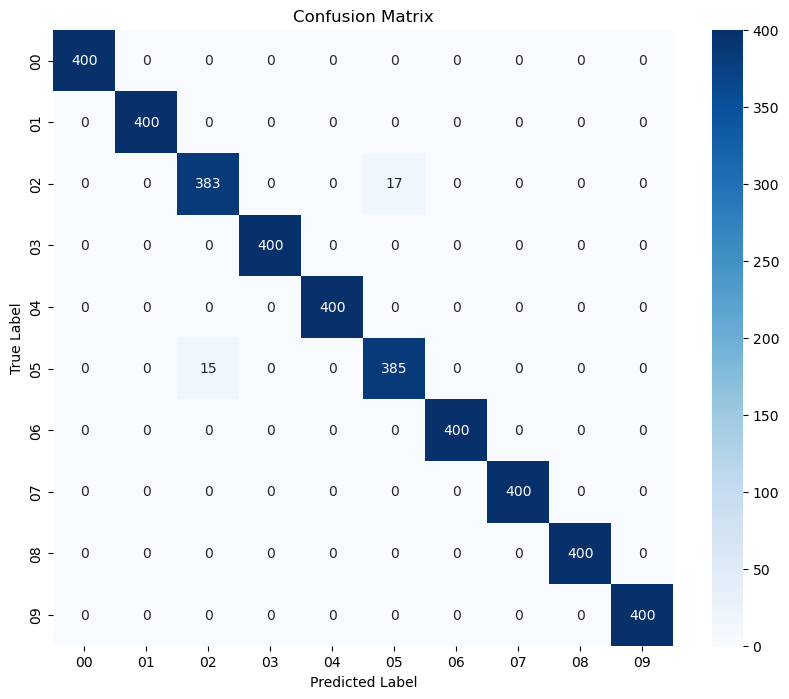

In [14]:
# 📌 Cell 7: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(labels), yticklabels=np.unique(labels), cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Predict and Visualize a Sample

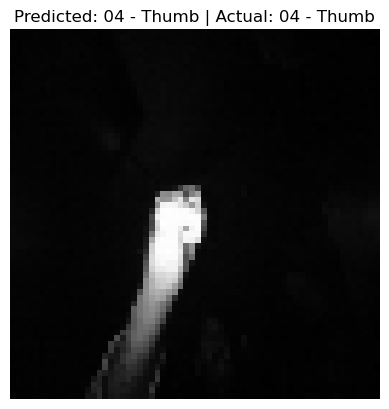

In [16]:
# 📌 Cell 8: Predict and Visualize a Sample with Gesture Name and Number

# Gesture name mapping (based on LeapGestRecog dataset)
gesture_dict = {
    '00': 'L',
    '01': 'Palm',
    '02': 'Fist',
    '03': 'Fist Moved',
    '04': 'Thumb',
    '05': 'Index',
    '06': 'OK',
    '07': 'Palm Moved',
    '08': 'C',
    '09': 'Down'
}

# Recreate and fit LabelEncoder if not already available
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Pick a random sample
sample_index = np.random.randint(0, X_test.shape[0])
sample_image = X_test[sample_index].reshape(64, 64)

# Predict label and decode gesture
predicted_label = clf.predict([X_test[sample_index]])[0]
predicted_folder = label_encoder.inverse_transform([predicted_label])[0]
actual_folder = label_encoder.inverse_transform([y_test[sample_index]])[0]

# Map to gesture name
predicted_name = gesture_dict.get(predicted_folder, "Unknown")
actual_name = gesture_dict.get(actual_folder, "Unknown")

# Display result
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted: {predicted_folder} - {predicted_name} | Actual: {actual_folder} - {actual_name}")
plt.axis('off')
plt.show()